In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('datasets/dummy_survey_data.csv')
df.columns = ['Timestamp', 'Name', 'Age', 'Height', 'Weight', 'Gender', 'Education']

In [61]:
df.head()

,Timestamp,Name,Age,Height,Weight,Gender,Education
0,12/13/2022 0:44,Aa,25,67,70,Male,Graduate
1,12/13/2022 0:45,Rr,28,66,69,Female,Postgraduate
2,12/13/2022 0:49,Gg,24,70,70,Male,Undergraduate
3,12/13/2022 0:50,Bb,23,68,56,Male,Undergraduate
4,12/13/2022 0:55,Cc,28,67,80,Female,Postgraduate


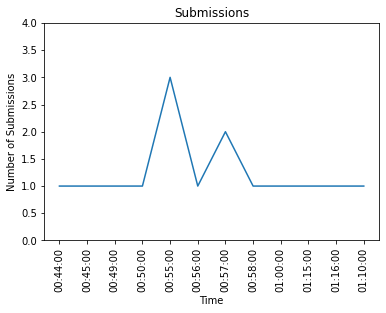

In [46]:
submit_time = pd.to_datetime(df['Timestamp']).dt.time.value_counts(sort=False)

plt.plot(submit_time.index.astype(str), submit_time.tolist())
plt.xticks(rotation =90)
plt.xlabel('Time')
plt.ylabel('Number of Submissions')
plt.ylim([0,max(submit_time.tolist())+1])
plt.title('Submissions')
plt.show()

In [47]:
df.describe()

,Age,Height,Weight
count,15.000000,15.000000,15.000000
mean,26.133333,68.133333,72.200000
std,2.825058,2.799660,6.635403
min,23.000000,62.000000,56.000000
25%,24.000000,67.000000,69.000000
50%,25.000000,68.000000,72.000000
75%,28.000000,70.000000,77.000000
max,32.000000,74.000000,81.000000


[]

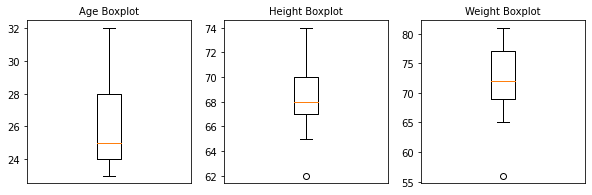

In [48]:
plt.figure(figsize=(10,3))
cont_cols = ['Age', 'Height', 'Weight']
for i in range(len(cont_cols)):
    plt.subplot(1,3,i+1)
    plt.boxplot(df[cont_cols[i]])
    plt.yticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xticks([])
    plt.title(cont_cols[i] + ' Boxplot', fontsize=10)
plt.plot()

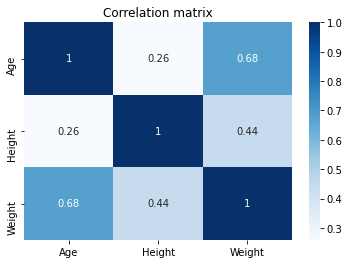

In [59]:
sns.heatmap(df.corr(), cmap = 'Blues', annot=True)
plt.title('Correlation matrix')
plt.show()

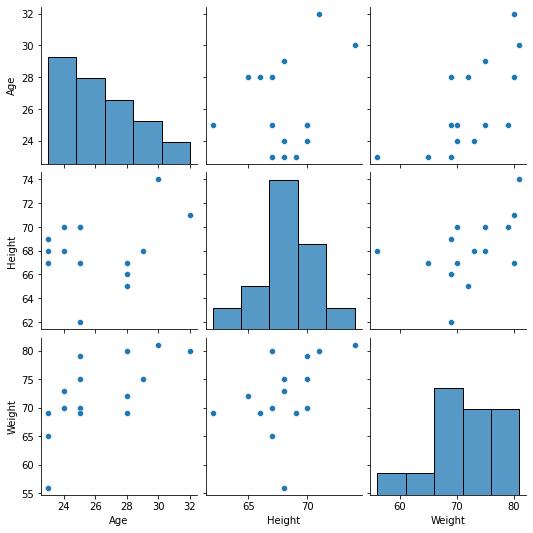

In [50]:
sns.pairplot(df)
plt.show()

### Gender counts

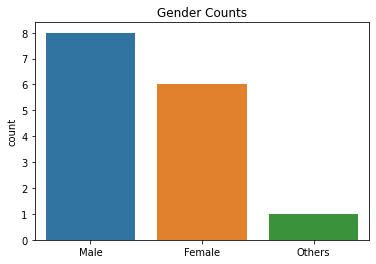

In [51]:
sns.countplot(x = df['Gender'])
plt.xlabel('')
plt.title('Gender Counts')
plt.show()

### Education ratio

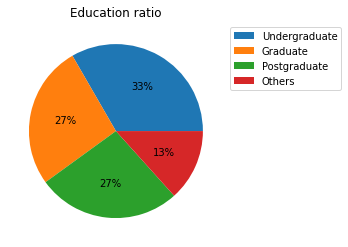

In [52]:
plt.pie(df['Education'].value_counts(), autopct='%.0f%%')
plt.legend(df['Education'].value_counts().index,  bbox_to_anchor=(1,1))
plt.title('Education ratio')
plt.show()

### Age as per education

In [53]:
df.groupby('Education').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,4.0,24.75,0.500000,24.0,24.75,25.0,25.00,25.0
Others,2.0,31.00,1.414214,30.0,30.50,31.0,31.50,32.0
Postgraduate,4.0,28.25,0.500000,28.0,28.00,28.0,28.25,29.0
Undergraduate,5.0,23.60,0.894427,23.0,23.00,23.0,24.00,25.0


### Height as per Gender

In [54]:
df.groupby('Gender').describe()['Height']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,6.0,65.833333,2.136976,62.0,65.25,66.5,67.00,68.0
Male,8.0,69.625000,2.199838,67.0,68.00,69.5,70.25,74.0
Others,1.0,70.000000,NaN,70.0,70.00,70.0,70.00,70.0


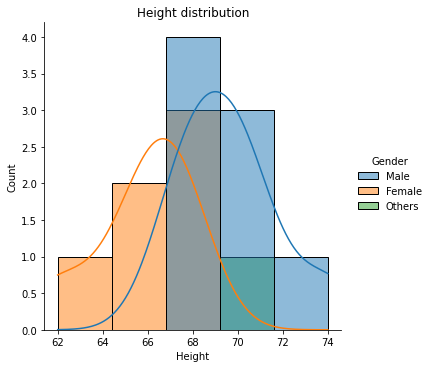

In [55]:
sns.displot(data=dff, x='Height', kde=True, hue = 'Gender') #col = 'Education'
plt.title('Height distribution')
plt.show()

### Height and weight as per gender

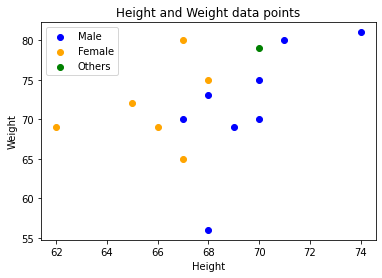

In [58]:
males = df[df['Gender']=='Male']
females = df[df['Gender']=='Female']
others = df[df['Gender']=='Others']

plt.scatter(males['Height'], males['Weight'], c = 'blue')
plt.scatter(females['Height'], females['Weight'], c = 'orange')
plt.scatter(others['Height'], others['Weight'], c = 'green')
plt.legend(['Male', 'Female', 'Others'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight data points')

plt.show()

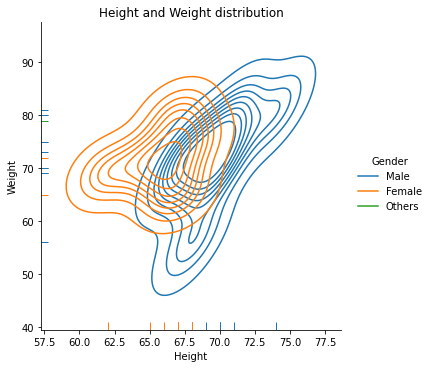

In [57]:
sns.displot(data=df, x='Height', y = 'Weight', hue = 'Gender', kind = 'kde', rug=True)
plt.title('Height and Weight distribution')
plt.show()